In [63]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
import tensorflow as tf

from tensorflow.keras.applications.vgg16 import VGG16 as Model
from tensorflow.keras.applications.vgg16 import preprocess_input

import numpy as np
from matplotlib import pyplot as plt
# %matplotlib inline
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from tensorflow.keras.applications.vgg16 import decode_predictions
import json

In [64]:
# no = ['brain_tumor_dataset/no']
# yes = ['brain_tumor_dataset/yes']

In [42]:
img1 = load_img('brain_tumor_dataset/test/no/1 no.jpeg', target_size=(224, 224))
img2 = load_img('brain_tumor_dataset/test/no/2 no.jpeg', target_size=(224, 224))
img3 = load_img('brain_tumor_dataset/test/yes/Y1.jpg', target_size=(224, 224))
img4 = load_img('brain_tumor_dataset/test/yes/Y2.jpg', target_size=(224, 224))

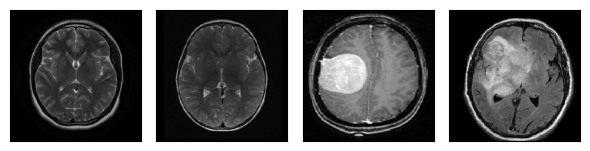

In [43]:
#create array of images
images = np.asarray([np.array(img1), np.array(img2), np.array(img3), np.array(img4)])

subprot_args = {
   'nrows': 1,
   'ncols': 4,
   'figsize': (6, 3),
   'subplot_kw': {'xticks': [], 'yticks': []}
  }
f, ax = plt.subplots(**subprot_args)
for i in range(len(images)):
    ax[i].imshow(images[i])
plt.tight_layout()
plt.show()

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for training with data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3  # Set the validation split to 30% of the data
)

# Create an ImageDataGenerator for testing, only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'brain_tumor_dataset/train',  # This is the source directory for training images
    target_size=(224, 224),  # All images will be resized to 224x224 VGG16 input size
    batch_size=32,
    class_mode='binary',
    subset='training',  # Set as training data
    shuffle=True  # Shuffle the data for better training
)

validation_generator = train_datagen.flow_from_directory(
    'brain_tumor_dataset/train',  # Same directory as training, but will use validation split
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',  # Set as validation data
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    'brain_tumor_dataset/test',  # This is the source directory for test images
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Generally, we don't shuffle test data
)


Found 178 images belonging to 2 classes.
Found 75 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


In [45]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze the convolutional base

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(base_model.input, x)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [46]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/5


d:\Semester 2\ML2\Assignments\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 60s 11s/step - accuracy: 0.5882 - loss: 2.8899 - val_accuracy: 0.6562 - val_loss: 3.3434
Epoch 2/5
1/5 ━━━━━━━━━━━━━━━━━━━━ 26s 7s/step - accuracy: 0.5312 - loss: 4.7491

C:\Users\Ayushee\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 655ms/step - accuracy: 0.5312 - loss: 4.7491 - val_accuracy: 0.5455 - val_loss: 1.4702
Epoch 3/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 57s 10s/step - accuracy: 0.5462 - loss: 2.8131 - val_accuracy: 0.6562 - val_loss: 2.2320
Epoch 4/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 592ms/step - accuracy: 0.8125 - loss: 0.9042 - val_accuracy: 0.7273 - val_loss: 2.5366
Epoch 5/5
5/5 ━━━━━━━━━━━━━━━━━━━━ 48s 10s/step - accuracy: 0.7101 - loss: 1.5901 - val_accuracy: 0.6406 - val_loss: 1.3347


In [47]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,252,933 (203.14 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 25,692,164 (98.01 MB)

In [49]:
#convert to numpy array for reshaping
img1 = img_to_array(img1)
img2 = img_to_array(img2)
img3 = img_to_array(img3)
img4 = img_to_array(img4)

#reshape to prepare for processing
img1 = img1.reshape(1,224,224,3)
img2 = img2.reshape(1,224,224,3)
img3 = img3.reshape(1,224,224,3)
img4 = img4.reshape(1,224,224,3)

#preprocess to prepare for input
img1 = preprocess_input(img1)
img2 = preprocess_input(img2)
img3 = preprocess_input(img3)
img4 = preprocess_input(img4)

In [54]:
# predictions with input images
yhat1 = model.predict(img1)
yhat2 = model.predict(img2)
yhat3 = model.predict(img3)
yhat4 = model.predict(img4)

# Since we're doing binary classification, interpret the sigmoid output
label1 = 'yes' if yhat1 > 0.5 else 'no'
label2 = 'yes' if yhat2 > 0.5 else 'no'
label3 = 'yes' if yhat3 > 0.5 else 'no'
label4 = 'yes' if yhat4 > 0.5 else 'no'

# # extract top most prediction for each input
# label1 = label1[0][0]
# label2 = label2[0][0]
# label3 = label3[0][0]
# label4 = label4[0][0]

print("Prediction for Image 1:", label1)
print("Prediction for Image 2:", label2)
print("Prediction for Image 3:", label3)
print("Prediction for Image 4:", label4)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
Prediction for Image 1: no
Prediction for Image 2: no
Prediction for Image 3: yes
Prediction for Image 4: no


In [55]:
# #download class file
# !wget "https://raw.githubusercontent.com/raghakot/keras-vis/master/resources/imagenet_class_index.json"

#prepare 1000 classes
CLASS_INDEX = json.load(open("imagenet_class_index.json"))
classlabel = []
for i_dict in range(len(CLASS_INDEX)):
    classlabel.append(CLASS_INDEX[str(i_dict)][1])
print("N of class={}".format(len(classlabel)))

#Top 5 classes predicted
class_idxs_sorted1 = np.argsort(yhat1.flatten())[::-1]
class_idxs_sorted2 = np.argsort(yhat2.flatten())[::-1]
class_idxs_sorted3 = np.argsort(yhat3.flatten())[::-1]
class_idxs_sorted4 = np.argsort(yhat4.flatten())[::-1]

topNclass         = 5

print('\nfirst image\n')
for i, idx in enumerate(class_idxs_sorted1[:topNclass]):
    print("Top {} predicted class:     Pr(Class={:18} [index={}])={:5.3f}".format(
          i + 1,classlabel[idx],idx,yhat1[0,idx]))

print('\nsecond image\n')
for i, idx in enumerate(class_idxs_sorted2[:topNclass]):
    print("Top {} predicted class:     Pr(Class={:18} [index={}])={:5.3f}".format(
          i + 1,classlabel[idx],idx,yhat2[0,idx]))

print('\nthird image\n')
for i, idx in enumerate(class_idxs_sorted3[:topNclass]):
    print("Top {} predicted class:     Pr(Class={:18} [index={}])={:5.3f}".format(
          i + 1,classlabel[idx],idx,yhat3[0,idx]))

print('\nFourth image\n')
for i, idx in enumerate(class_idxs_sorted4[:topNclass]):
    print("Top {} predicted class:     Pr(Class={:18} [index={}])={:5.3f}".format(
          i + 1,classlabel[idx],idx,yhat4[0,idx]))


N of class=1000

first image

Top 1 predicted class:     Pr(Class=tench              [index=0])=0.000

second image

Top 1 predicted class:     Pr(Class=tench              [index=0])=0.000

third image

Top 1 predicted class:     Pr(Class=tench              [index=0])=1.000

Fourth image

Top 1 predicted class:     Pr(Class=tench              [index=0])=0.000


In [56]:
import collections.abc
import sys

# Ensure that Iterable can be imported from collections directly
if not hasattr(collections, 'Iterable'):
    collections.Iterable = collections.abc.Iterable

# Now, you can import the keras-vis module
from vis.utils import utils
from vis.utils.utils import find_layer_idx, apply_modifications

In [59]:
import tensorflow as tf
from vis.utils.utils import find_layer_idx, apply_modifications
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import BinaryScore

# Since your model should already be using a linear activation if you've adapted it as described earlier, you might not need to swap the activation.
# If the final layer is not linear (e.g., it's sigmoid), and you wish to visualize layer activations,
# you may consider using a model modifier to temporarily replace activations during visualization.
model_modifier = ReplaceToLinear()

# Assuming the final layer's index is -1, which is common.
layer_idx = find_layer_idx(model, 'dense_5')

# Score for the presence of a tumor ('yes' might correspond to 1)
# This simplifies to checking the model's output against a threshold, usually 0.5 for sigmoid outputs.
score = BinaryScore([1])

# Here, `model_modifier` is applied only during the visualization process, and doesn't permanently alter the model.
# It's useful if you're using tools like tf-keras-vis that might expect linear output for gradient computation.
# Note: Uncomment the next line if visualization tools or certain interpretation methods are being used.
# model = apply_modifications(model, model_modifier=model_modifier)

In [57]:
# from vis.utils.utils import find_layer_idx, apply_modifications
# #get the input image index
# from tf_keras_vis.utils.scores import CategoricalScore
# from collections.abc import Iterable

# # swap softmax layer with linear layer 
# layer_idx = find_layer_idx(model, 'predictions')
# model.layers[-1].activation = tf.keras.activations.linear
# model = apply_modifications(model)


# #cat - 281, dog -235 , hen -8, tiger - 292
# score = CategoricalScore([281, 235, 8 , 292])


ValueError: No layer with name 'predictions' within the model

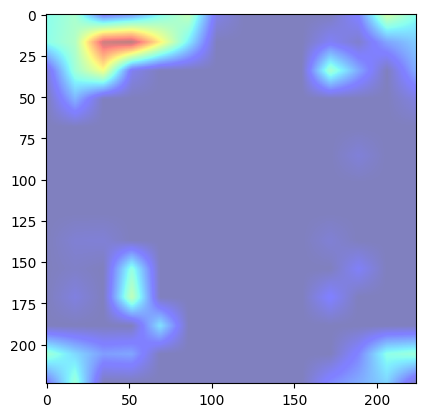

In [60]:
# Example usage with tf-keras-vis to visualize how model decisions are made
from tf_keras_vis.gradcam import Gradcam

# Assuming that you're using Gradcam for visualization
gradcam = Gradcam(model, model_modifier=ReplaceToLinear(), clone=False)

# You would need an input image prepared as before to use Gradcam
# Assuming `img` is loaded and preprocessed as needed
# For example visualization, let's say img is your preprocessed input of shape (1, 224, 224, 3)
cam = gradcam(score, img1)

# Plot the heatmap over the original image
import matplotlib.pyplot as plt

plt.imshow(cam[0], cmap='jet', alpha=0.5)  # Overlaying the CAM heatmap with an alpha on the original image
plt.show()

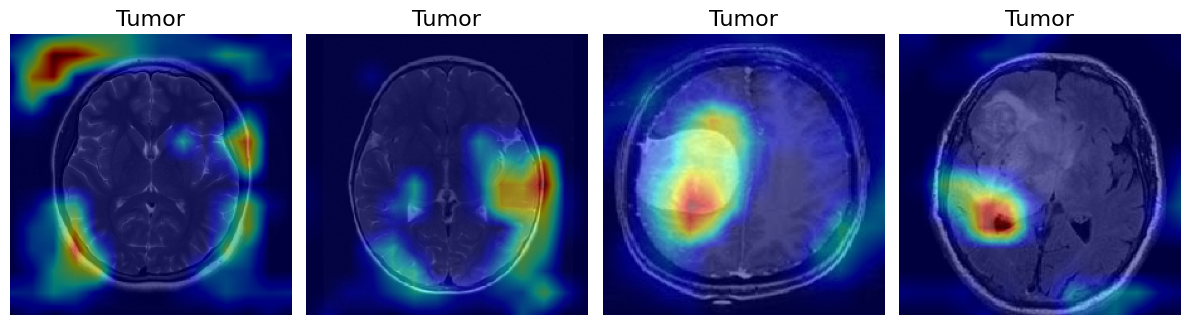

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from tensorflow.keras.applications.vgg16 import preprocess_input
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import BinaryScore

# Assuming 'images' is a list or batch of images loaded correctly and needs preprocessing
input_images = preprocess_input(images)  # preprocess input based on VGG16 requirements

# Create Gradcam object
gradcam = Gradcam(model,
                  model_modifier=ReplaceToLinear(),  # Ensures the last layer is linear for visualization
                  clone=True)

# Define a binary score for visualization, focusing on '1' for tumor present
score = BinaryScore([1])  # Use [0] if focusing on no tumor

# Generate heatmap with GradCAM
cam = gradcam(score,
              input_images,
              penultimate_layer=-1)  # Automatically uses the last convolutional layer

# Input classes for binary classification
input_classes = ['No Tumor', 'Tumor']

# Show generated images
f, ax = plt.subplots(nrows=1, ncols=len(images), figsize=(12, 4))  # Adjust number of columns based on input images
for i in range(len(images)):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)  # Ensure heatmap is formatted correctly
    ax[i].set_title(input_classes[(images[i].sum() > 0).astype(int)], fontsize=16)  # Determine class based on model output
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5) # Overlay the heatmap
    ax[i].axis('off')
plt.tight_layout()
plt.show()

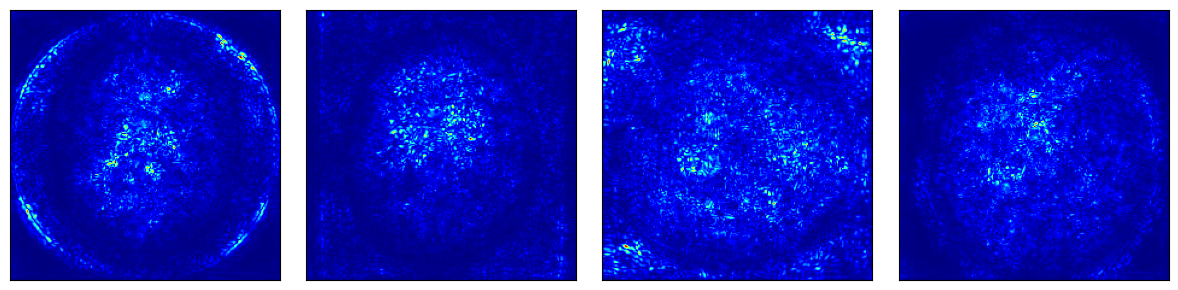

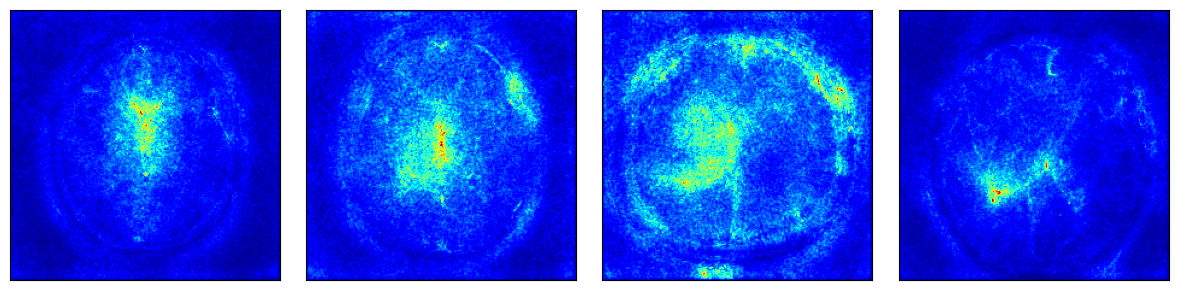

In [62]:
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
import matplotlib.pyplot as plt

# Assuming 'model' and 'input_images' have been defined appropriately
# Create Saliency object
saliency = Saliency(model, clone=False)

# Define your score function for the "Tumor" class
# This could focus on '1' for tumor present (assuming binary '1' and '0' labels)
score = BinaryScore([1])  # Assuming '1' represents "Tumor"

# Generate saliency map
saliency_map = saliency(score, input_images)
saliency_map = normalize(saliency_map)

# Setup subplot arguments based on the number of images (assuming fewer images for simplicity)
num_images = len(input_images)  # Adjust number of columns based on the actual number of images
subprot_args = {
    'nrows': 1,
    'ncols': num_images,
    'figsize': (num_images * 3, 3),
    'subplot_kw': {'xticks': [], 'yticks': []}
}

f, ax = plt.subplots(**subprot_args)
for i in range(num_images):
    ax[i].imshow(saliency_map[i], cmap='jet')
plt.tight_layout()
plt.show()

# If smoothing is desired to average out noise in the saliency map
saliency_map = saliency(score, input_images, smooth_samples=20, smooth_noise=0.20)  # Adjust noise level as needed
saliency_map = normalize(saliency_map)

f, ax = plt.subplots(**subprot_args)
for i in range(num_images):
    ax[i].imshow(saliency_map[i], cmap='jet')
plt.tight_layout()
plt.show()